In [29]:
from sympy import symbols, init_printing
init_printing()
from celmech.andoyer import Andoyer, AndoyerHamiltonian
import numpy as np

# A comparison between Andoyer and  Poincare Hamiltonian integrations

In [87]:
from celmech.poincare import Poincare, PoincareHamiltonian

In [103]:
G = 4*np.pi**2
masses = [1., 1.e-5, 1.e-6]
Phi_equil = 6
j = 7
k = 2
a10 = 1.
andvars = Andoyer.from_elements(j, k, Phi_equil, 0, a10, G, masses)
pvars =  andvars.to_Poincare()
Asim = AndoyerHamiltonian(andvars)
Psim = PoincareHamiltonian(pvars)
Psim.add_all_resonance_subterms(1,2,7,2)



In [117]:
andvars = Andoyer.from_elements(j, k, Phi_equil, 0, a10, G, masses)
pvars =  andvars.to_Poincare()
Asim = AndoyerHamiltonian(andvars)
Psim = PoincareHamiltonian(pvars)
Psim.add_all_resonance_subterms(1,2,7,2)

sim = pvars.to_Simulation()
ps = sim.particles
Norbits = 3000
Nout = 1000

tmax = Norbits*sim.particles[1].P
times = np.linspace(0, tmax, Nout)

timescale = Hsim.state.params['timescale']
symtimes = times/abs(timescale)

Psol = np.zeros((2, Nout))
Asol = np.zeros((2, Nout))

for i, time in enumerate(times):
    #andvars = Andoyer.from_Poincare(Psim.state, j, k, a10)
    #Asol[:,i] = [Asim.state.Phi, Asim.state.phi]
    #Psol[:,i] = [andvars.Phi, andvars.phi]
        
    Asim.integrate(symtimes[i])
    Psim.integrate(time)

AttributeError: Need to initialize Hamiltonian

# A comparison with N-body

In [ ]:
G = 4*np.pi**2
masses = [1., 1.e-5, 1.e-6]
Phi_equil = 6
j = 3
k = 1
a10 = 1.

andvars = Andoyer.from_elements(j, k, Phi_equil, 0, a10, G, masses)
andvars.Y = .5
sim = andvars.to_Simulation()
Hsim = AndoyerHamiltonian(andvars)

In [73]:
ps = sim.particles

B0 = Hsim.state.Brouwer
W0 = Hsim.state.W

Norbits = 3000
Nout = 1000
tmax = Norbits*sim.particles[1].P
times = np.linspace(0, tmax, Nout)
timescale = Hsim.state.params['timescale']
symtimes = times/abs(timescale)

Nsol = np.zeros((2, Nout))
symsol = np.zeros((2, Nout))
pratio, BrouwerErr, WErr, Ks = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
Ws, ws = np.zeros(Nout), np.zeros(Nout)

for i, time in enumerate(times):
    pratio[i] = ps[2].P/ps[1].P
    andvars = Andoyer.from_Simulation(sim, j, k, a10)
    BrouwerErr[i] = abs((andvars.Brouwer-B0)/B0)
    WErr[i] = abs((andvars.W-W0)/W0)
    Ks[i] = andvars.K
    Ws[i] = andvars.W
    ws[i] = andvars.w

    symsol[:,i] = [Hsim.state.Phi, Hsim.state.phi]
    Nsol[:,i] = [andvars.Phi, andvars.phi]

    sim.integrate(np.sign(timescale)*time)    
    Hsim.integrate(symtimes[i])

/opt/cfpython/anaconda3.4/lib/python3.4/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in double_scalars


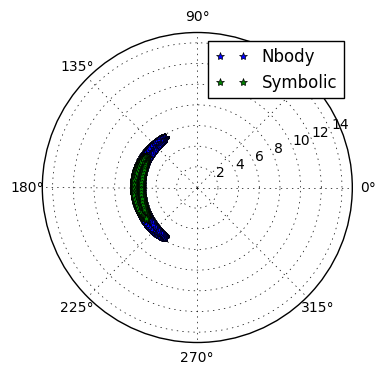

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.subplot('111', projection='polar')
ax.plot(Nsol[1,:], Nsol[0,:], '*', label='Nbody')
ax.plot(symsol[1,:], symsol[0,:], '*', label='Symbolic')
ax.set_rlim(0,15)
ax.legend()

In [75]:
def wrap(val):
    while val < -np.pi:
        val += 2*np.pi
    while val > np.pi:
        val -= 2*np.pi
    return val

npwrap = np.vectorize(wrap)

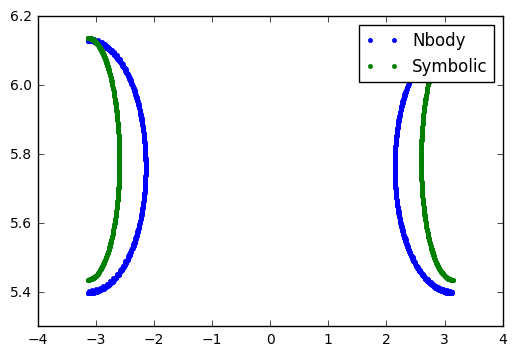

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(npwrap(Nsol[1,:]), Nsol[0,:], '.', label='Nbody')
ax.plot(npwrap(symsol[1,:]), symsol[0,:], '.', label='Symbolic')
ax.legend()

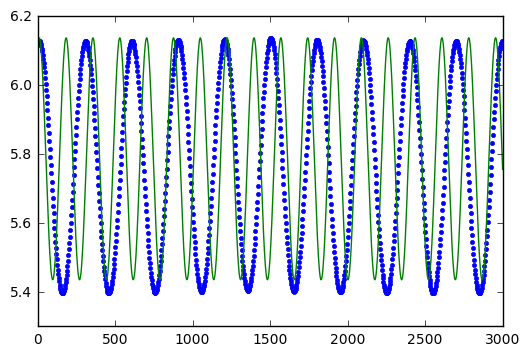

In [77]:
plt.plot(times,Nsol[0],'.')
plt.plot(times,symsol[0])